## AdaMLS : Object Detection Running Example : Cluster Analysis : Find Optimum K

In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
dfn = pd.read_csv('detection_results_nano.txt')
dfs = pd.read_csv('detection_results_small.txt')
dfm = pd.read_csv('detection_results_medium.txt')
dfl = pd.read_csv('detection_results_large.txt')
dfx = pd.read_csv('detection_results_xlarge.txt')

#### Elbow Method:
In the elbow method, we try to find the point where the within-cluster sum of squares (WCSS) starts to decrease at a slower rate. The idea is that adding more clusters beyond this point doesn't improve the model significantly.

We first initialize elbow_k to None, which will later store the optimal K-value found using the elbow method.
We set a threshold (in this case, 0.1) to determine when the rate of decrease in WCSS is low enough to be considered an elbow point. This value can be adjusted based on your dataset.
We loop through the WCSS values, calculate the difference in WCSS between consecutive K-values (normalized by the previous WCSS value), and check if this difference is below the threshold. If it is, we've found the elbow point, and we store the corresponding K-value in elbow_k.

#### Silhouette Score:
The silhouette score is a measure of cluster quality, with higher values indicating better-defined clusters. It ranges from -1 to 1, where a score close to 1 indicates well-separated clusters, and a score close to -1 indicates poorly separated clusters.

We find the index of the maximum silhouette score in the sil_scores list and add 2 (because the list is 0-indexed and K starts from 2) to get the optimal K-value (sil_max_k) based on the silhouette scores.
Combine both methods to find the optimal K-value:
We take the maximum of the K-values obtained from both methods (elbow_k and sil_max_k) as the final optimal_k. The rationale behind this is to have a more robust choice for the number of clusters, considering both cluster compactness (elbow method) and separation (silhouette score).

#### Conclusion:
Finally, the code prints the optimal_k value, which is the recommended number of clusters for your K-means clustering.

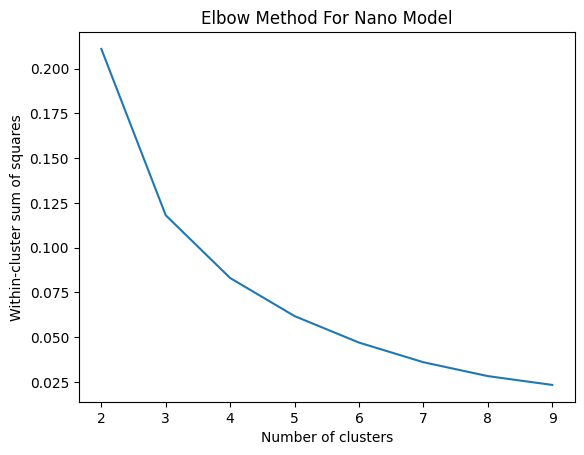

K=2, Silhouette score=0.6389
K=3, Silhouette score=0.5391
K=4, Silhouette score=0.5162
K=5, Silhouette score=0.5186
K=6, Silhouette score=0.5184
K=7, Silhouette score=0.5117
K=8, Silhouette score=0.5221
K=9, Silhouette score=0.5163


Optimal K-value For Yolov5 Nano Model: 2


In [4]:
# Extract the relevant column for clustering
X_n = dfn[['Response Time(s)']]

# Determine the within-cluster sum of squares for different K values
wcss_n = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_n)
    wcss_n.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 10), wcss_n)
plt.title('Elbow Method For Nano Model')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

# Determine the silhouette score for different K values
sil_scores_n = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_n)
    sil_scores_n.append(silhouette_score(X_n, kmeans.labels_))

# Print the silhouette scores for each K value
for k, sil_score_n in enumerate(sil_scores_n):
    print(f"K={k+2}, Silhouette score={sil_score_n:.4f}")

# Determine the optimal K-value using the elbow method
elbow_kn = None
threshold = 0.5  # You can adjust this value based on your dataset
for i in range(1, len(wcss_n)):
    diff = (wcss_n[i-1] - wcss_n[i]) / wcss_n[i-1]
    if diff < threshold:
        elbow_kn = i + 1
        break

# Determine the optimal K-value using the silhouette scores
sil_max_kn = sil_scores_n.index(max(sil_scores_n)) + 2

# Combine both methods to get the optimal K-value
optimal_kn = max(elbow_kn, sil_max_kn)
print("\n\n\033[1mOptimal K-value For Yolov5 Nano Model:\033[0m", optimal_kn)


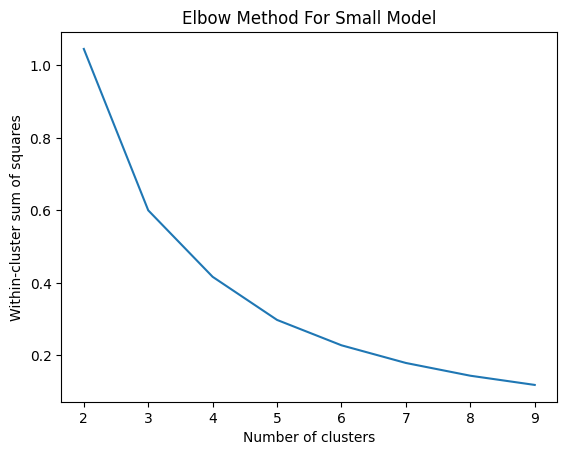

K=2, Silhouette score=0.6340
K=3, Silhouette score=0.5310
K=4, Silhouette score=0.5110
K=5, Silhouette score=0.5175
K=6, Silhouette score=0.5161
K=7, Silhouette score=0.5199
K=8, Silhouette score=0.5162
K=9, Silhouette score=0.5185


Optimal K-value For Yolov5 Small Model: 2


In [8]:
# Extract the relevant column for clustering
X_s = dfs[['Response Time(s)']]

# Determine the within-cluster sum of squares for different K values
wcss_s = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_s)
    wcss_s.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 10), wcss_s)
plt.title('Elbow Method For Small Model')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

# Determine the silhouette score for different K values
sil_scores_s = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_s)
    sil_scores_s.append(silhouette_score(X_s, kmeans.labels_))

# Print the silhouette scores for each K value
for k, sil_score_s in enumerate(sil_scores_s):
    print(f"K={k+2}, Silhouette score={sil_score_s:.4f}")

# Determine the optimal K-value using the elbow method
elbow_ks = None
threshold = 0.5  # You can adjust this value based on your dataset
for i in range(1, len(wcss_s)):
    diff = (wcss_s[i-1] - wcss_s[i]) / wcss_s[i-1]
    if diff < threshold:
        elbow_ks = i + 1
        break

# Determine the optimal K-value using the silhouette scores
sil_max_ks = sil_scores_s.index(max(sil_scores_s)) + 2

# Combine both methods to get the optimal K-value
optimal_ks = max(elbow_ks, sil_max_ks)
print("\n\n\033[1mOptimal K-value For Yolov5 Small Model:\033[0m", optimal_ks)


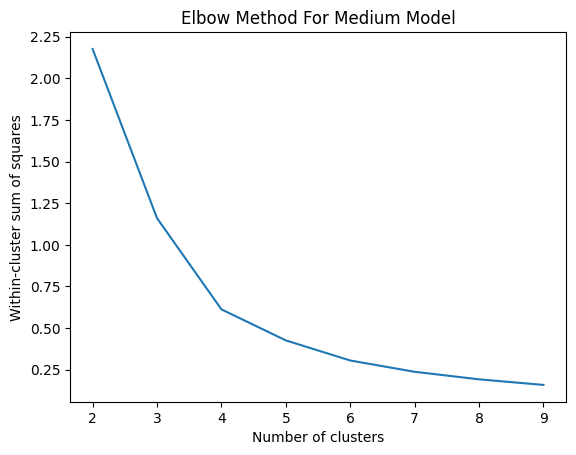

K=2, Silhouette score=0.7883
K=3, Silhouette score=0.5544
K=4, Silhouette score=0.5972
K=5, Silhouette score=0.6168
K=6, Silhouette score=0.6238
K=7, Silhouette score=0.5519
K=8, Silhouette score=0.5502
K=9, Silhouette score=0.5380


Optimal K-value For Yolov5 Medium Model: 2


In [9]:
# Extract the relevant column for clustering
X_m = dfm[['Response Time(s)']]

# Determine the within-cluster sum of squares for different K values
wcss_m = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_m)
    wcss_m.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 10), wcss_m)
plt.title('Elbow Method For Medium Model')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

# Determine the silhouette score for different K values
sil_scores_m = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_m)
    sil_scores_m.append(silhouette_score(X_m, kmeans.labels_))

# Print the silhouette scores for each K value
for k, sil_score_m in enumerate(sil_scores_m):
    print(f"K={k+2}, Silhouette score={sil_score_m:.4f}")

# Determine the optimal K-value using the elbow method
elbow_km = None
threshold = 0.5  # You can adjust this value based on your dataset
for i in range(1, len(wcss_m)):
    diff = (wcss_m[i-1] - wcss_m[i]) / wcss_m[i-1]
    if diff < threshold:
        elbow_km = i + 1
        break

# Determine the optimal K-value using the silhouette scores
sil_max_km = sil_scores_m.index(max(sil_scores_m)) + 2

# Combine both methods to get the optimal K-value
optimal_km = max(elbow_km, sil_max_km)
print("\n\n\033[1mOptimal K-value For Yolov5 Medium Model:\033[0m", optimal_km)


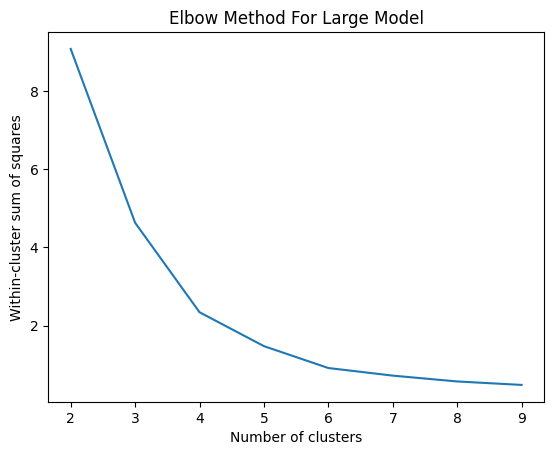

K=2, Silhouette score=0.7976
K=3, Silhouette score=0.7218
K=4, Silhouette score=0.6743
K=5, Silhouette score=0.7157
K=6, Silhouette score=0.7238
K=7, Silhouette score=0.7249
K=8, Silhouette score=0.7204
K=9, Silhouette score=0.6212


Optimal K-value For Yolov5 Large Model: 2


In [10]:
# Extract the relevant column for clustering
X_l = dfl[['Response Time(s)']]

# Determine the within-cluster sum of squares for different K values
wcss_l = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_l)
    wcss_l.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 10), wcss_l)
plt.title('Elbow Method For Large Model')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

# Determine the silhouette score for different K values
sil_scores_l = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_l)
    sil_scores_l.append(silhouette_score(X_l, kmeans.labels_))

# Print the silhouette scores for each K value
for k, sil_score_l in enumerate(sil_scores_l):
    print(f"K={k+2}, Silhouette score={sil_score_l:.4f}")

# Determine the optimal K-value using the elbow method
elbow_kl = None
threshold = 0.5  # You can adjust this value based on your dataset
for i in range(1, len(wcss_l)):
    diff = (wcss_l[i-1] - wcss_l[i]) / wcss_l[i-1]
    if diff < threshold:
        elbow_kl = i + 1
        break

# Determine the optimal K-value using the silhouette scores
sil_max_kl = sil_scores_l.index(max(sil_scores_l)) + 2

# Combine both methods to get the optimal K-value
optimal_kl = max(elbow_kl, sil_max_kl)
print("\n\n\033[1mOptimal K-value For Yolov5 Large Model:\033[0m", optimal_kl)


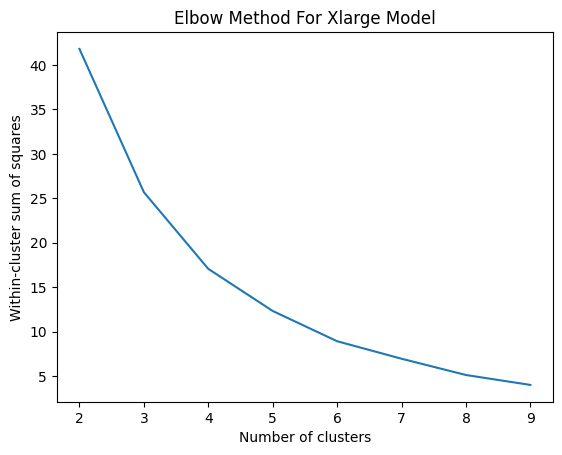

K=2, Silhouette score=0.7726
K=3, Silhouette score=0.5723
K=4, Silhouette score=0.5977
K=5, Silhouette score=0.6641
K=6, Silhouette score=0.6643
K=7, Silhouette score=0.6670
K=8, Silhouette score=0.6749
K=9, Silhouette score=0.6758


Optimal K-value For Yolov5 Xlarge Model: 2


In [11]:
# Extract the relevant column for clustering
X_x = dfx[['Response Time(s)']]

# Determine the within-cluster sum of squares for different K values
wcss_x = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_x)
    wcss_x.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(2, 10), wcss_x)
plt.title('Elbow Method For Xlarge Model')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

# Determine the silhouette score for different K values
sil_scores_x = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_x)
    sil_scores_x.append(silhouette_score(X_x, kmeans.labels_))

# Print the silhouette scores for each K value
for k, sil_score_x in enumerate(sil_scores_x):
    print(f"K={k+2}, Silhouette score={sil_score_x:.4f}")

# Determine the optimal K-value using the elbow method
elbow_kx = None
threshold = 0.5  # You can adjust this value based on your dataset
for i in range(1, len(wcss_x)):
    diff = (wcss_x[i-1] - wcss_x[i]) / wcss_x[i-1]
    if diff < threshold:
        elbow_kx = i + 1
        break

# Determine the optimal K-value using the silhouette scores
sil_max_kx = sil_scores_x.index(max(sil_scores_x)) + 2

# Combine both methods to get the optimal K-value
optimal_kx = max(elbow_kx, sil_max_kx)
print("\n\n\033[1mOptimal K-value For Yolov5 Xlarge Model:\033[0m", optimal_kx)


In [10]:
import csv

# Create a list of dictionaries with the data
data = [
    {'model': 'Yolov5 Nano', 'k_value': optimal_kn},
    {'model': 'Yolov5 Small', 'k_value': optimal_ks},
    {'model': 'Yolov5 Medium', 'k_value': optimal_km},
    {'model': 'Yolov5 Large', 'k_value': optimal_kl},
    {'model': 'Yolov5 Xlarge', 'k_value': optimal_kx}
]

# Open the CSV file for writing
with open('k_values.csv', mode='w', newline='') as csv_file:
    # Create a writer object
    writer = csv.DictWriter(csv_file, fieldnames=['model', 'k_value'])

    # Write the header row
    writer.writeheader()

    # Write the data rows
    writer.writerows(data)